# Posthoc Analysis of IMAGEN:
The preliminary results in our IMAGEN paper advocates for a more in-depth understanding of what contributes to the significant performance of the ML models for the three time-points: <br>
<li>Baseline (<b>BL</b>): Age <tr> <b>14</b></li>
<li>Follow 1 year (<b>FU1</b>): Age <b>16</b></li>
<li>Follow 2 year (<b>FU2</b>): Age <b>19</b></li>
<li>Follow 3 year (<b>FU3</b>): Age <b>22</b></li>

<br>
Such in-depth understanding can be achieved by performing follow-up analysis:

In [1]:
import math
import time
import parmap
import pickle
import multiprocessing
import matplotlib.pyplot as plt
from imagen_posthocloader import *
from plot_results_posthoc import *

In [2]:
num_cores = multiprocessing.cpu_count()
print(f'Available CPU cores: {num_cores}')
num_cores = math.floor(num_cores/3)
print(f'Set CPU cores: {num_cores}')

Available CPU cores: 48
Set CPU cores: 16


In [3]:
DATA_DIR = "/ritter/share/data/IMAGEN"
posthoc = IMAGEN_posthoc()

# 4. Visualization SHAP
## 4.1. SHAP values

### 4.1.1. Load the data and model

<b> Load the model </b>

In [4]:
MODELS = posthoc.get_model("../../results/newlbls-clean-fu3-espad-fu3-19a-binge-*/*/")

<b> Load the data </b>

In [5]:
# train_dir = "newlbls-clean-fu3-espad-fu3-19a-binge-n650.h5"
# # load the training data
# tr_X, tr_X_col_names, tr_list = SHAP.get_train_data(train_dir, group=True)
# print(f"Training dataset: {tr_X.shape}, {len(tr_X_col_names)}, {tr_list[0].shape}")

holdout_dir = "newholdout-clean-fu3-espad-fu3-19a-binge-n102.h5"
# load the holdout data
ho_X, ho_X_col_names, ho_list = posthoc.get_holdout_data(holdout_dir, group=True)
# print(f"Holdout dataset: {ho_X.shape}, {len(ho_X_col_names)}, "
#       f"{ho_list[0].shape}, {ho_list[1].shape}")

<b> Get the SHAP input list </b>

In [6]:
# # generate the SHAP input list of the training
# tr_INPUT = SHAP.get_list(MODELS, tr_X)
# generate the SHAP input list of the holdout
ho_INPUT = posthoc.get_list(MODELS, ho_X)
# print(f"Number of training set: {len(tr_INPUT)}\n\n" # , One example: {tr_INPUT[0:1]}\n\n"
print(f"Number of holdout set: {len(ho_INPUT)}") # , One example: {tr_INPUT[0:1]}")

Number of holdout set: 28


### 4.1.2. Get the shap value

<b> One by one

In [ ]:
# # One by one
# INPUT = tr_INPUT[0]
# start_time = time.time()
# _ = SHAP.get_SHAP(INPUT)
# print("--- %s seconds ---" % (time.time() - start_time))

<b> Multi processing </b>

In [ ]:
# # Hodlout: Multi processing
# INPUT = ho_INPUT
# start_time = time.time()
# _ = parmap.map(SHAP.get_SHAP, INPUT, pm_pbar=True, pm_processes=num_cores)
# print("--- %s seconds ---" % (time.time() - start_time))

### 4.1.3. Get the plot

<b> Load the dataset </b>

In [7]:
file = '/ritter/share/data/IMAGEN/posthoc/explainers/SVM-rbf0_multi.sav'
with open(file, 'rb') as fp:
    load_shap_values = pickle.load(fp)
if not os.path.isdir("figures"):
    os.makedirs("figures")

In [8]:
X = ho_X
X_col_names = ho_X_col_names

In [9]:
for i, Col in enumerate(X_col_names):
    print(i, Col)

0 T1w_cor_bankssts-lh-volume
1 T1w_cor_caudalanteriorcingulate-lh-volume
2 T1w_cor_caudalmiddlefrontal-lh-volume
3 T1w_cor_cuneus-lh-volume
4 T1w_cor_entorhinal-lh-volume
5 T1w_cor_fusiform-lh-volume
6 T1w_cor_inferiorparietal-lh-volume
7 T1w_cor_inferiortemporal-lh-volume
8 T1w_cor_isthmuscingulate-lh-volume
9 T1w_cor_lateraloccipital-lh-volume
10 T1w_cor_lateralorbitofrontal-lh-volume
11 T1w_cor_lingual-lh-volume
12 T1w_cor_medialorbitofrontal-lh-volume
13 T1w_cor_middletemporal-lh-volume
14 T1w_cor_parahippocampal-lh-volume
15 T1w_cor_paracentral-lh-volume
16 T1w_cor_parsopercularis-lh-volume
17 T1w_cor_parsorbitalis-lh-volume
18 T1w_cor_parstriangularis-lh-volume
19 T1w_cor_pericalcarine-lh-volume
20 T1w_cor_postcentral-lh-volume
21 T1w_cor_posteriorcingulate-lh-volume
22 T1w_cor_precentral-lh-volume
23 T1w_cor_precuneus-lh-volume
24 T1w_cor_rostralanteriorcingulate-lh-volume
25 T1w_cor_rostralmiddlefrontal-lh-volume
26 T1w_cor_superiorfrontal-lh-volume
27 T1w_cor_superiorparietal-

In [ ]:
# for model_name in MODELS:
#     if ( model_name.upper() not in MODEL):
#         print("skipping model {}".format(model_name))
#         continue
#     print("generating SHAP values for model = {} ..".format(model_name))
#     for i, model in enumerate(MODELS[model_name]):
#         if i!=0:
#             print("Skipping model '{}': {}' as it is taking too long".format(model_name, i))
#             continue
#         if i==0:
#             # 1. summary bar plot of feature importnace
#             shap.summary_plot(load_shap_values, features=X, feature_names=X_col_names, plot_type="bar", show=False)
#             plt.title(model_name+": "+str(i))
#             plt.savefig(f"figures/{model_name}{i}_holdout_bar.pdf", bbox_inches='tight')

<b> ROI 01: swarm plot showing shap values vs feature values ordered by feature importance </b>

Text(0.5, 1.0, 'SVM-rbf0 holdout')

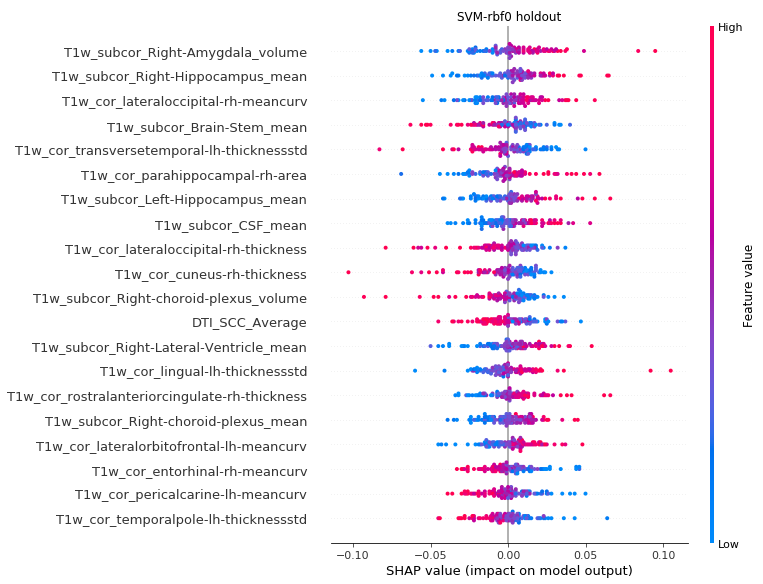

In [10]:
shap.summary_plot(load_shap_values, features=X, feature_names=X_col_names, plot_type="dot", show=False)
plt.title("SVM-rbf0 holdout")

In [ ]:
# for model_name in MODELS:
#     if ( model_name.upper() not in MODEL):
#         print("skipping model {}".format(model_name))
#         continue
#     print("generating SHAP values for model = {} ..".format(model_name))
#     for i, model in enumerate(MODELS[model_name]):
#         if i!=0:
#             print("Skipping model '{}': {}' as it is taking too long".format(model_name, i))
#             continue
#         if i==0:
#             # 2. swarm plot showing shap values vs feature values ordered by feature importance
#             shap.summary_plot(load_shap_values, features=X, feature_names=X_col_names, plot_type="dot", show=False)
#             plt.title(model_name+": "+str(i))
#             plt.savefig(f"figures/{model_name}{i}_holdout_swarm.pdf", bbox_inches='tight')

<b> ROI 02: Class difference plot showing shap values vs feature values ordered by feature importance </b>

In [11]:
X_col_names = ho_X_col_names
class_mask = ho_list[3].astype(bool)

Text(0.5, 1.0, 'SVM-rbf0 holdout')

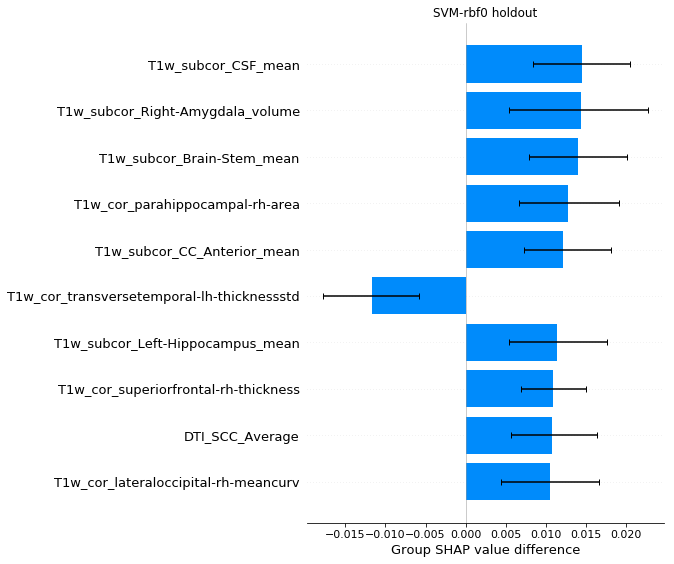

In [12]:
shap.group_difference_plot(load_shap_values.values, group_mask=class_mask, feature_names=X_col_names, show=False, max_display=10)
plt.title("SVM-rbf0 holdout")

In [ ]:
# for model_name in MODELS:
#     if ( model_name.upper() not in MODEL):
#         print("skipping model {}".format(model_name))
#         continue
#     print("generating SHAP values for model = {} ..".format(model_name))
#     for i, model in enumerate(MODELS[model_name]):
#         if i!=0:
#             print("Skipping model '{}': {}' as it is taking too long".format(model_name, i))
#             continue
#         if i==0:
#             # 3. sex difference plot
#             shap.group_difference_plot(load_shap_values.values, group_mask=class_mask, feature_names=X_col_names, show=False, max_display=10)
#             plt.title(model_name+":"+str(i))
#             # plt.savefig("figrues/{}_bar-sexdiff.pdf".format(model_name+str(i)), bbox_inches='tight')
#             plt.savefig(f"figures/{model_name}{i}_holdout_bar-classdiff.pdf", bbox_inches='tight')

<b> ROI 03: Sex difference plot showing shap values vs feature values ordered by feature importance </b>

In [13]:
X_col_names = ho_X_col_names
sex_mask = ho_list[2].astype(bool)

Text(0.5, 1.0, 'SVM-rbf0 holdout')

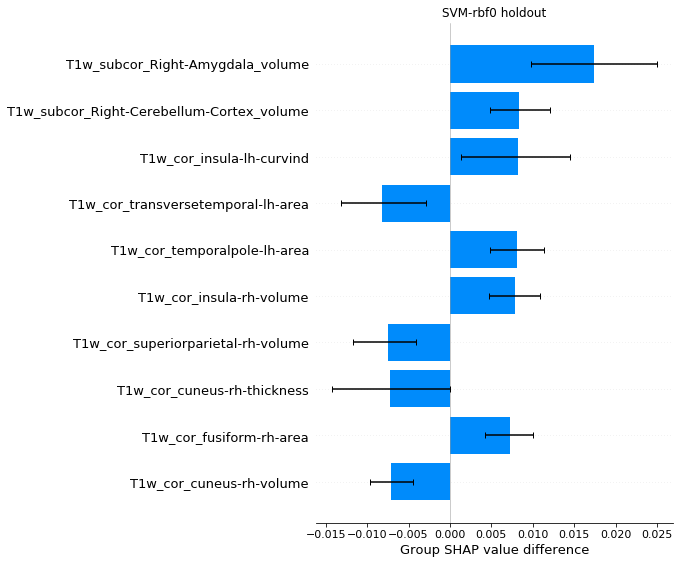

In [14]:
shap.group_difference_plot(load_shap_values.values, group_mask=sex_mask, feature_names=X_col_names, show=False, max_display=10)
plt.title("SVM-rbf0 holdout")

In [ ]:
# for model_name in MODELS:
#     if ( model_name.upper() not in MODEL):
#         print("skipping model {}".format(model_name))
#         continue
#     print("generating SHAP values for model = {} ..".format(model_name))
#     for i, model in enumerate(MODELS[model_name]):
#         if i!=0:
#             print("Skipping model '{}': {}' as it is taking too long".format(model_name, i))
#             continue
#         if i==0:
#             # 3. sex difference plot
#             shap.group_difference_plot(load_shap_values.values, group_mask=sex_mask, feature_names=X_col_names, show=False, max_display=10)
#             plt.title(model_name+":"+str(i))
#             # plt.savefig("figrues/{}_bar-sexdiff.pdf".format(model_name+str(i)), bbox_inches='tight')
#             plt.savefig(f"figures/{model_name}{i}_holdout_bar-sexdiff.pdf", bbox_inches='tight')

<b> ROI 04: summary bar plot of feature importnace </b>

Text(0.5, 1.0, 'SVM-rbf0 holdout')

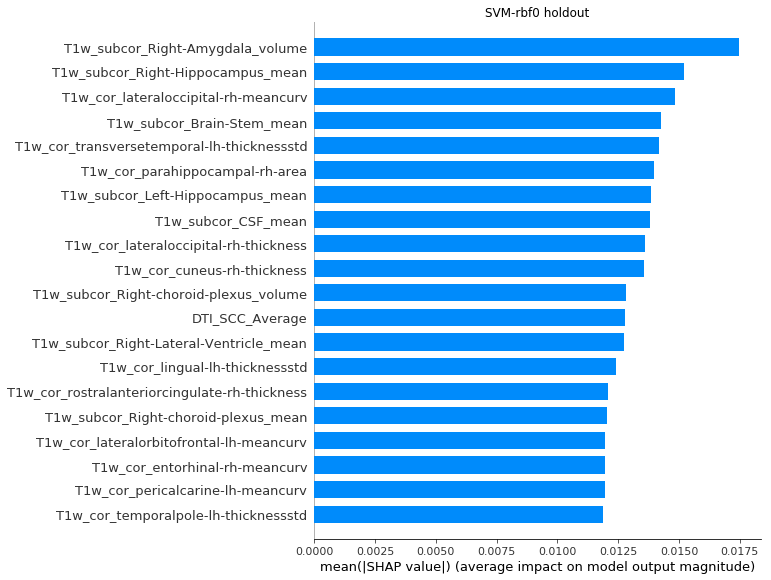

In [15]:
shap.summary_plot(load_shap_values, features=X, feature_names=X_col_names, plot_type="bar", show=False)
plt.title("SVM-rbf0 holdout")

<b> ROI 05: holdout feature clustering </b>

In [16]:
with open('explainers/holdout_clustering.sav', 'rb') as fp:
    load_clustering = pickle.load(fp)

In [18]:
with open('explainers/SVM-rbf0_multi.sav', 'rb') as fp:
    load_shap_values = pickle.load(fp)

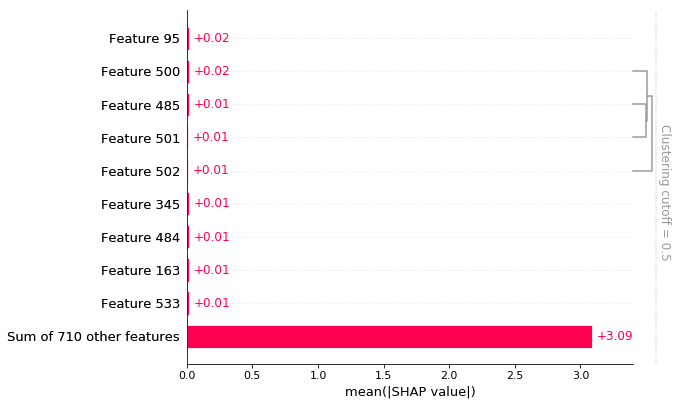

In [19]:
shap.plots.bar(load_shap_values, clustering=load_clustering)

### 4.1.4. Common feature importance in SVM-rbf

<b>Load the SHAP</b>

In [4]:
SHAP_SVM_rbf = posthoc.read_SHAP('IMAGEN_SHAP_SVM_rbf.csv')
SHAP_SVM_rbf

SVM rbf0 name  \
0                T1w_subcor_Right-Amygdala_volume   
1               T1w_subcor_Right-Hippocampus_mean   
2            T1w_cor_lateraloccipital-rh-meancurv   
3                      T1w_subcor_Brain-Stem_mean   
4      T1w_cor_transversetemporal-lh-thicknessstd   
..                                            ...   
714                 T1w_subcor_5th-Ventricle_mean   
715       T1w_subcor_Left-WM-hypointensities_mean   
716      T1w_subcor_Right-WM-hypointensities_mean   
717   T1w_subcor_Left-non-WM-hypointensities_mean   
718  T1w_subcor_Right-non-WM-hypointensities_mean   

                                    SVM rbf1 name  \
0                   T1w_subcor_CC_Anterior_volume   
1       T1w_subcor_Right-Cerebellum-Cortex_volume   
2                                 DTI_SCC_Average   
3        T1w_subcor_Left-Cerebellum-Cortex_volume   
4                 T1w_cor_lingual-lh-thicknessstd   
..                                            ...   
714                 T1w_subcor_5th-Ventricle_mean   
715       T1w_subcor_Left-WM-hypointensities_mean   
716      T1w_subcor_Right-WM-hypointensities_mean   
717   T1w_subcor_Left-non-WM-hypointensities_mean   
718  T1w_subcor_Right-non-WM-hypointensities_mean   

                                     SVM rbf2 name  \
0              T1w_cor_paracentral-rh-thicknessstd   
1    T1w_cor_rostralanteriorcingulate-rh-thickness   
2                    T1w_subcor_CC_Anterior_volume   
3                T1w_cor_pericalcarine-lh-meancurv   
4                 T1w_subcor_Right-Amygdala_volume   
..                                             ...   
714                  T1w_subcor_5th-Ventricle_mean   
715        T1w_subcor_Left-WM-hypointensities_mean   
716       T1w_subcor_Right-WM-hypointensities_mean   
717    T1w_subcor_Left-non-WM-hypointensities_mean   
718   T1w_subcor_Right-non-WM-hypointensities_mean   

                                     SVM rbf3 name  \
0                T1w_subcor_Left-Inf-Lat-Vent_mean   
1               T1w_subcor_Right-Inf-Lat-Vent_mean   
2                                  DTI_SCC_Average   
3    T1w_cor_rostralanteriorcingulate-rh-thickness   
4            T1w_subcor_Left-choroid-plexus_volume   
..                                             ...   
714                  T1w_subcor_5th-Ventricle_mean   
715        T1w_subcor_Left-WM-hypointensities_mean   
716       T1w_subcor_Right-WM-hypointensities_mean   
717    T1w_subcor_Left-non-WM-hypointensities_mean   
718   T1w_subcor_Right-non-WM-hypointensities_mean   

                                    SVM rbf4 name  \
0                      T1w_subcor_Brain-Stem_mean   
1               T1w_cor_parahippocampal-lh-volume   
2            T1w_cor_lateraloccipital-rh-meancurv   
3                                 DTI_SCC_Average   
4      T1w_cor_transversetemporal-lh-thicknessstd   
..                                            ...   
714                 T1w_subcor_5th-Ventricle_mean   
715       T1w_subcor_Left-WM-hypointensities_mean   
716      T1w_subcor_Right-WM-hypointensities_mean   
717   T1w_subcor_Left-non-WM-hypointensities_mean   
718  T1w_subcor_Right-non-WM-hypointensities_mean   

                                    SVM rbf5 name  \
0                     T1w_subcor_CC_Anterior_mean   
1           T1w_cor_lateraloccipital-rh-thickness   
2                      T1w_subcor_CC_Central_mean   
3        T1w_cor_lateralorbitofrontal-lh-meancurv   
4                 T1w_cor_parahippocampal-rh-area   
..                                            ...   
714                 T1w_subcor_5th-Ventricle_mean   
715       T1w_subcor_Left-WM-hypointensities_mean   
716      T1w_subcor_Right-WM-hypointensities_mean   
717   T1w_subcor_Left-non-WM-hypointensities_mean   
718  T1w_subcor_Right-non-WM-hypointensities_mean   

                                    SVM rbf6 name  sorted SVM rbf0 mean  \
0              T1w_subcor_Right-Inf-Lat-Vent_mean              0.017480   
1                  T1w_cor_entorhinal-rh

In [5]:
SHAP_SVM_rbf.loc[143]

SVM rbf0 name                   T1w_cor_parstriangularis-rh-gauscurv
SVM rbf1 name                                      DTI_UNC-L_Average
SVM rbf2 name                T1w_cor_lateralorbitofrontal-rh-curvind
SVM rbf3 name                     T1w_cor_supramarginal-rh-thickness
SVM rbf4 name                    T1w_cor_lateraloccipital-rh-curvind
SVM rbf5 name           T1w_cor_rostralanteriorcingulate-lh-meancurv
SVM rbf6 name                  T1w_cor_transversetemporal-rh-curvind
sorted SVM rbf0 mean                                      0.00685294
sorted SVM rbf1 mean                                      0.00654902
sorted SVM rbf2 mean                                      0.00682353
sorted SVM rbf3 mean                                      0.00702941
sorted SVM rbf4 mean                                      0.00737255
sorted SVM rbf5 mean                                      0.00739216
sorted SVM rbf6 mean                                       0.0057451
sorted SVM rbf0 std               

<b>mean|SHAP| distribution</b>

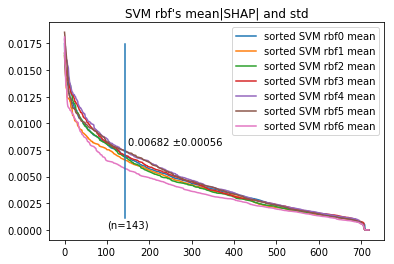

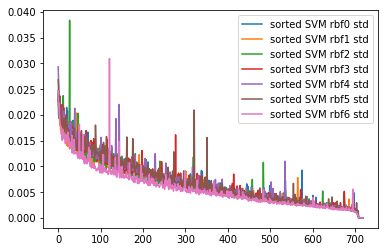

In [6]:
mean = round(SHAP_SVM_rbf.loc[143][7:14].mean(), 5)
std = round(SHAP_SVM_rbf.loc[143][7:14].std(), 5)
# mean
SHAP_SVM_rbf[SHAP_SVM_rbf.columns[7:14]].plot()
# text
plt.title("SVM rbf's mean|SHAP| and std")
plt.axvline(x=143, ymin=0.1, ymax=0.9)
plt.text(100, 0.0002, '(n=143)')
plt.text(150, 0.008, f"{mean} \u00B1{std}")
# std
SHAP_SVM_rbf[SHAP_SVM_rbf.columns[14:]].plot()

20% point: 143


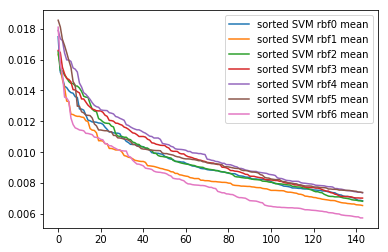

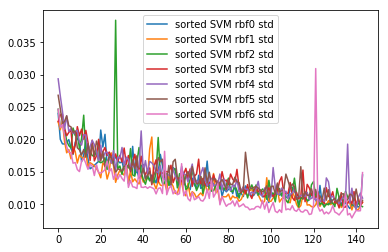

In [7]:
number = math.floor(len(SHAP_SVM_rbf)*0.2)
ST_SVM_rbf = SHAP_SVM_rbf.loc[:number]
# Mean
ST_SVM_rbf[ST_SVM_rbf.columns[7:14]].plot()
# Std
ST_SVM_rbf[ST_SVM_rbf.columns[14:]].plot()
print(f"20% point: {number}")

<b>Generate the SHAP table</b>

In [8]:
DF = SHAP_SVM_rbf

In [9]:
SHAP_table(DF, viz = False)

Type  SVM-rbf 0  SVM-rbf1  SVM-rbf2  SVM-rbf3  SVM-rbf4  \
0              DTI         63        63        63        63        63   
1  T1w subcortical        108       108       108       108       108   
2     T1w cortical        548       548       548       548       548   

   SVM-rbf5  SVM-rbf6  Intersection  
0        63        63            63  
1       108       108           108  
2       548       548           548

<b> Top 1 - Common feature importance (n=14)

In [10]:
SHAP_top30 = SHAP_SVM_rbf.loc[:14]
DF = SHAP_top30
SHAP_table(DF, viz = True)

selected DTI (n=0): set() 

selected T1w Subcortical: (n=0): set() 

selected T1w Cortical: (n=1): {'T1w_cor_lateraloccipital-rh-thickness'} 




Type  SVM-rbf 0  SVM-rbf1  SVM-rbf2  SVM-rbf3  SVM-rbf4  \
0              DTI          1         1         1         2         1   
1  T1w subcortical          7         5         5         6         5   
2     T1w cortical          7         9         9         7         9   

   SVM-rbf5  SVM-rbf6  Intersection  
0         1         2             0  
1         4         7             0  
2        10         6             1

<b> Top 2 - Common feature importance (n=29)

In [11]:
SHAP_top30 = SHAP_SVM_rbf.loc[:28]
DF = SHAP_top30
SHAP_table(DF, viz = True)

selected DTI (n=1): {'DTI_SCC_Average'} 

selected T1w Subcortical: (n=0): set() 

selected T1w Cortical: (n=1): {'T1w_cor_lateraloccipital-rh-thickness'} 




Type  SVM-rbf 0  SVM-rbf1  SVM-rbf2  SVM-rbf3  SVM-rbf4  \
0              DTI          2         1         2         3         1   
1  T1w subcortical         10        10         9        11         8   
2     T1w cortical         17        18        18        15        20   

   SVM-rbf5  SVM-rbf6  Intersection  
0         2         3             1  
1         5        13             0  
2        22        13             1

<b> Top 5 - Common feature importance (n=47)

In [12]:
SHAP_top30 = SHAP_SVM_rbf.loc[:46]
DF = SHAP_top30
SHAP_table(DF, viz = True)

selected DTI (n=2): {'DTI_SCC_Average', 'DTI_RLIC-R_Average'} 

selected T1w Subcortical: (n=1): {'T1w_subcor_Left-Hippocampus_mean'} 

selected T1w Cortical: (n=2): {'T1w_cor_parahippocampal-rh-area', 'T1w_cor_lateraloccipital-rh-thickness'} 




Type  SVM-rbf 0  SVM-rbf1  SVM-rbf2  SVM-rbf3  SVM-rbf4  \
0              DTI          3         3         3         4         4   
1  T1w subcortical         14        15        14        20        12   
2     T1w cortical         30        29        30        23        31   

   SVM-rbf5  SVM-rbf6  Intersection  
0         3         6             2  
1        10        17             1  
2        34        24             2

<b> Top 10 - Common feature importance (n=71)

In [13]:
SHAP_top30 = SHAP_SVM_rbf.loc[:70]
DF = SHAP_top30
SHAP_table(DF, viz = True)

selected DTI (n=2): {'DTI_SCC_Average', 'DTI_RLIC-R_Average'} 

selected T1w Subcortical: (n=4): {'T1w_subcor_CSF_mean', 'T1w_subcor_Left-choroid-plexus_volume', 'T1w_subcor_Left-Hippocampus_mean', 'T1w_subcor_Brain-Stem_mean'} 

selected T1w Cortical: (n=4): {'T1w_cor_superiorparietal-rh-thickness', 'T1w_cor_parahippocampal-rh-area', 'T1w_cor_cuneus-rh-thickness', 'T1w_cor_lateraloccipital-rh-thickness'} 




Type  SVM-rbf 0  SVM-rbf1  SVM-rbf2  SVM-rbf3  SVM-rbf4  \
0              DTI          4         5         5         4         7   
1  T1w subcortical         15        19        18        24        14   
2     T1w cortical         52        47        48        43        50   

   SVM-rbf5  SVM-rbf6  Intersection  
0         4         7             2  
1        15        21             4  
2        52        43             4

<b> Top 15 - Common feature importance (n=100)

In [14]:
SHAP_top100 = SHAP_SVM_rbf.loc[:99]
DF = SHAP_top100
SHAP_table(DF, viz = True)

selected DTI (n=3): {'DTI_SCC_Average', 'DTI_RLIC_Average', 'DTI_RLIC-R_Average'} 

selected T1w Subcortical: (n=5): {'T1w_subcor_Left-Hippocampus_mean', 'T1w_subcor_Left-choroid-plexus_volume', 'T1w_subcor_Right-Hippocampus_mean', 'T1w_subcor_CSF_mean', 'T1w_subcor_Brain-Stem_mean'} 

selected T1w Cortical: (n=7): {'T1w_cor_parahippocampal-rh-area', 'T1w_cor_cuneus-rh-thickness', 'T1w_cor_rostralanteriorcingulate-rh-thickness', 'T1w_cor_superiorparietal-rh-thickness', 'T1w_cor_caudalanteriorcingulate-lh-foldind', 'T1w_cor_fusiform-lh-curvind', 'T1w_cor_lateraloccipital-rh-thickness'} 




Type  SVM-rbf 0  SVM-rbf1  SVM-rbf2  SVM-rbf3  SVM-rbf4  \
0              DTI          8         9         8         7        10   
1  T1w subcortical         21        25        24        27        21   
2     T1w cortical         71        66        68        66        69   

   SVM-rbf5  SVM-rbf6  Intersection  
0         4         9             3  
1        19        26             5  
2        77        65             7

<b> Top 35 - Common feature importance (n=143), Short tail (20%) </b>

In [15]:
print(f"20% point: {number}")
SHAP_20 = SHAP_SVM_rbf.loc[:number-1]
SHAP_80 = SHAP_SVM_rbf.loc[number:]
SHAP_20

20% point: 143


SVM rbf0 name  \
0              T1w_subcor_Right-Amygdala_volume   
1             T1w_subcor_Right-Hippocampus_mean   
2          T1w_cor_lateraloccipital-rh-meancurv   
3                    T1w_subcor_Brain-Stem_mean   
4    T1w_cor_transversetemporal-lh-thicknessstd   
..                                          ...   
138               T1w_cor_parsorbitalis-lh-area   
139            T1w_cor_postcentral-lh-thickness   
140            T1w_cor_pericalcarine-lh-foldind   
141       T1w_subcor_Left-Accumbens-area_volume   
142               T1w_subcor_4th-Ventricle_mean   

                                 SVM rbf1 name  \
0                T1w_subcor_CC_Anterior_volume   
1    T1w_subcor_Right-Cerebellum-Cortex_volume   
2                              DTI_SCC_Average   
3     T1w_subcor_Left-Cerebellum-Cortex_volume   
4              T1w_cor_lingual-lh-thicknessstd   
..                                         ...   
138    T1w_subcor_Right-Lateral-Ventricle_mean   
139         T1w_cor_parahippocampal-rh-foldind   
140            T1w_cor_pericalcarine-rh-volume   
141          T1w_cor_parahippocampal-rh-volume   
142   T1w_cor_inferiorparietal-rh-thicknessstd   

                                     SVM rbf2 name  \
0              T1w_cor_paracentral-rh-thicknessstd   
1    T1w_cor_rostralanteriorcingulate-rh-thickness   
2                    T1w_subcor_CC_Anterior_volume   
3                T1w_cor_pericalcarine-lh-meancurv   
4                 T1w_subcor_Right-Amygdala_volume   
..                                             ...   
138             T1w_cor_entorhinal-rh-thicknessstd   
139              T1w_cor_pericalcarine-rh-meancurv   
140           T1w_cor_isthmuscingulate-lh-meancurv   
141             T1w_cor_inferiorparietal-rh-volume   
142                                DTI_CGH_Average   

                                       SVM rbf3 name  \
0                  T1w_subcor_Left-Inf-Lat-Vent_mean   
1                 T1w_subcor_Right-Inf-Lat-Vent_mean   
2                                    DTI_SCC_Average   
3      T1w_cor_rostralanteriorcingulate-rh-thickness   
4              T1w_subcor_Left-choroid-plexus_volume   
..                                               ...   
138                     T1w_subcor_Brain-Stem_volume   
139                       T1w_cor_fusiform-rh-volume   
140             T1w_cor_transversetemporal-rh-volume   
141                   T1w_cor_entorhinal-rh-gauscurv   
142  T1w_cor_caudalanteriorcingulate-lh-thicknessstd   

                                  SVM rbf4 name  \
0                    T1w_subcor_Brain-Stem_mean   
1             T1w_cor_parahippocampal-lh-volume   
2          T1w_cor_lateraloccipital-rh-meancurv   
3                               DTI_SCC_Average   
4    T1w_cor_transversetemporal-lh-thicknessstd   
..                                          ...   
138                 T1w_subcor_Left-vessel_mean   
139        T1w_cor_inferiortemporal-rh-meancurv   
140                             DTI_SLF_Average   
141       T1w_subcor_BrainSegVol-to-eTIV_volume   
142       T1w_cor_caudalmiddlefrontal-rh-volume   

                                SVM rbf5 name  \
0                 T1w_subcor_CC_Anterior_mean   
1       T1w_cor_lateraloccipital-rh-thickness   
2                  T1w_subcor_CC_Central_mean   
3    T1w_cor_lateralorbitofrontal-lh-meancurv   
4             T1w_cor_parahippocampal-rh-area   
..                                        ...   
138       T1w_cor_paracentral-rh-thicknessstd   
139           T1w_cor_pericalcarine-rh-volume   
140            T1w_cor_precentral-rh-meancurv   
141                          DTI_ALIC_Average   
142                       DTI_FX/ST-L_Average   

                                   SVM rbf6 name  sorted SVM rbf0 mean  \
0             T1w_subcor_Right-Inf-Lat-Vent_mean              0.017480   
1                 T1w_cor_entorhinal-rh-meancurv              0.015196   
2              T1w_subcor_Right-Hippocampus_mean              0.014843   


In [16]:
DF = SHAP_20
SHAP_table(DF, viz = True)

selected DTI (n=4): {'DTI_SCC_Average', 'DTI_RLIC_Average', 'DTI_RLIC-R_Average', 'DTI_CGH-L_Average'} 

selected T1w Subcortical: (n=12): {'T1w_subcor_Left-Hippocampus_mean', 'T1w_subcor_Left-choroid-plexus_volume', 'T1w_subcor_Right-Amygdala_mean', 'T1w_subcor_Right-Hippocampus_mean', 'T1w_subcor_Right-Caudate_mean', 'T1w_subcor_CC_Anterior_volume', 'T1w_subcor_Left-Cerebellum-White-Matter_volume', 'T1w_subcor_CSF_mean', 'T1w_subcor_Right-Putamen_mean', 'T1w_subcor_Brain-Stem_mean', 'T1w_subcor_3rd-Ventricle_mean', 'T1w_subcor_Right-Inf-Lat-Vent_mean'} 

selected T1w Cortical: (n=19): {'T1w_cor_parahippocampal-rh-area', 'T1w_cor_rostralanteriorcingulate-lh-thickness', 'T1w_cor_cuneus-rh-thickness', 'T1w_cor_superiorparietal-rh-volume', 'T1w_cor_fusiform-lh-curvind', 'T1w_cor_lateraloccipital-rh-thickness', 'T1w_cor_precuneus-lh-meancurv', 'T1w_cor_precuneus-rh-thickness', 'T1w_cor_paracentral-lh-meancurv', 'T1w_cor_insula-lh-curvind', 'T1w_cor_middletemporal-lh-thickness', 'T1w_cor_p

Type  SVM-rbf 0  SVM-rbf1  SVM-rbf2  SVM-rbf3  SVM-rbf4  \
0              DTI         11        12        10        10        17   
1  T1w subcortical         29        30        30        32        27   
2     T1w cortical        103       101       103       101        99   

   SVM-rbf5  SVM-rbf6  Intersection  
0         9        12             4  
1        25        35            12  
2       109        96            19

<b> Bottom 403 - Common feature importance (n=576), Long tail (20%)</b>
SHAP_80

In [17]:
DF = SHAP_80
SHAP_table(DF, viz = False)

Type  SVM-rbf 0  SVM-rbf1  SVM-rbf2  SVM-rbf3  SVM-rbf4  \
0              DTI         52        51        53        53        46   
1  T1w subcortical         79        78        78        76        81   
2     T1w cortical        445       447       445       447       449   

   SVM-rbf5  SVM-rbf6  Intersection  
0        54        51            34  
1        83        73            57  
2       439       452           312

## 4.2. SHAP in Brain

### 4.2.1. Using FSL and Nilearn

<b> ROI 01: Visualization in MNI template

In [23]:
from nilearn import plotting
# https://nilearn.github.io/modules/generated/nilearn.plotting.plot_roi.html#nilearn.plotting.plot_roi

In [24]:
svm_result = '/ritter/share/jihoon/imagen_ml/posthoc_analysis/svmrbf0.nii.gz'
stat_img = "/ritter/share/data/IMAGEN/IMAGEN_prep-brainmask_BIDS/sub-000001123104/FU3/anat/sub-000001123104_ses-FU3_fs-brainmask_T1w_warped.nii.gz"


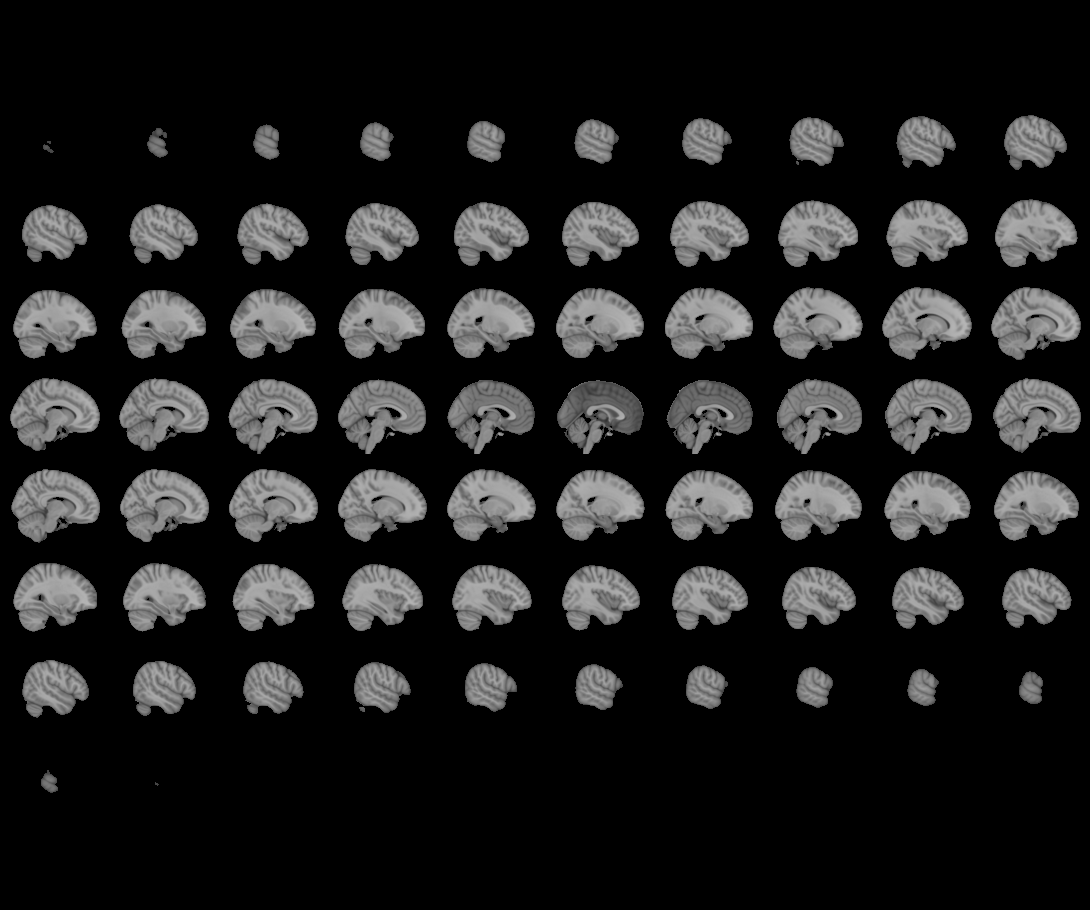
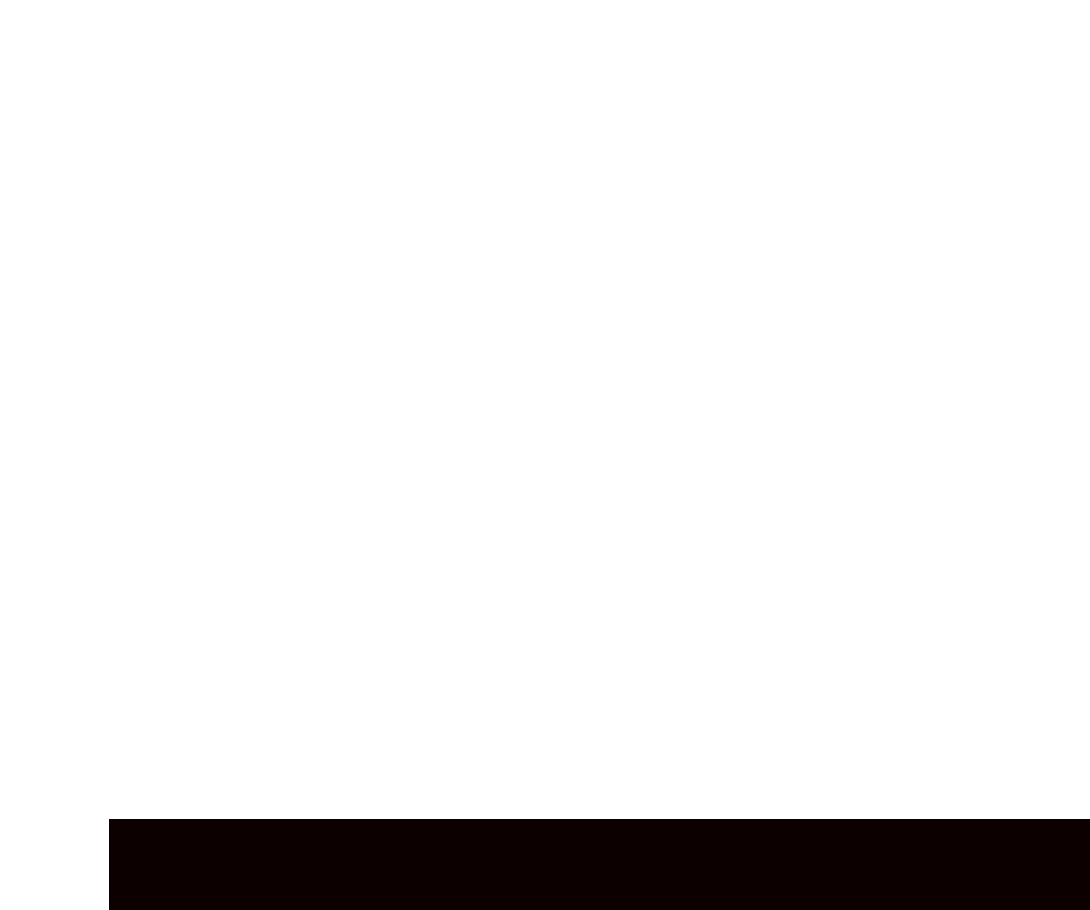

In [25]:
view = plotting.view_img(svm_result)
# In a Jupyter notebook, if ``view`` is the output of a cell, it will
# be displayed below the cell
view


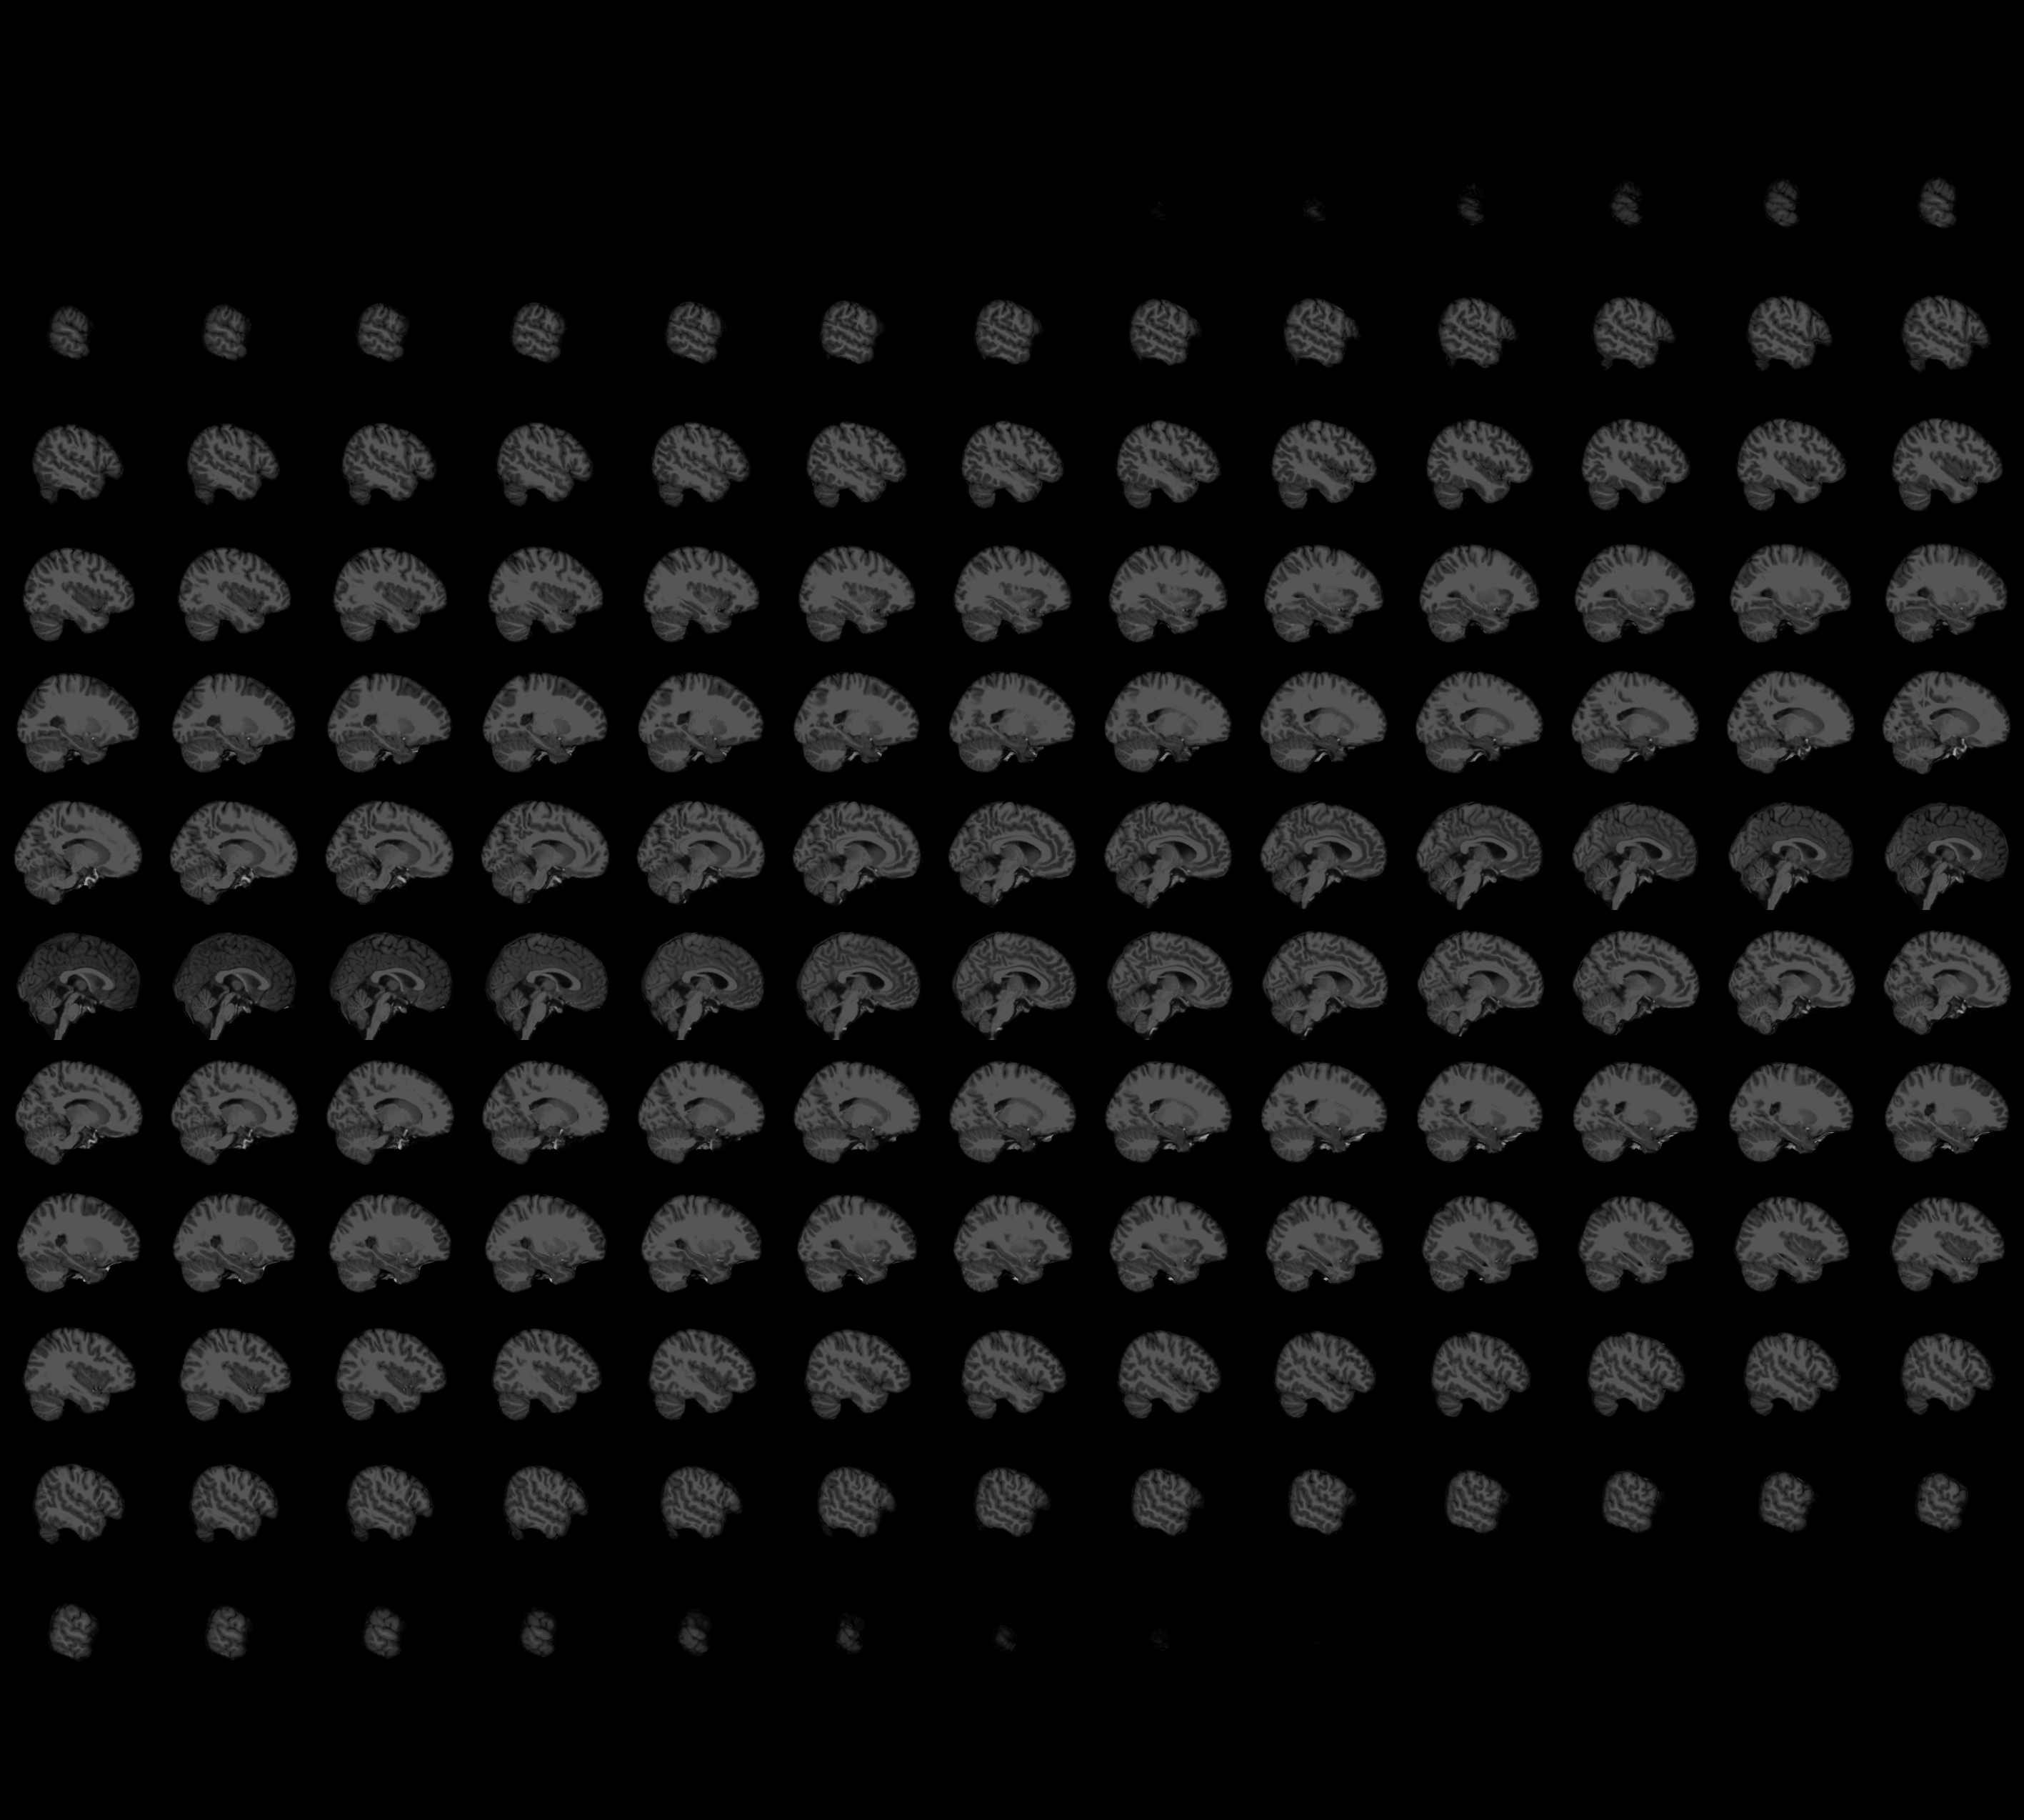
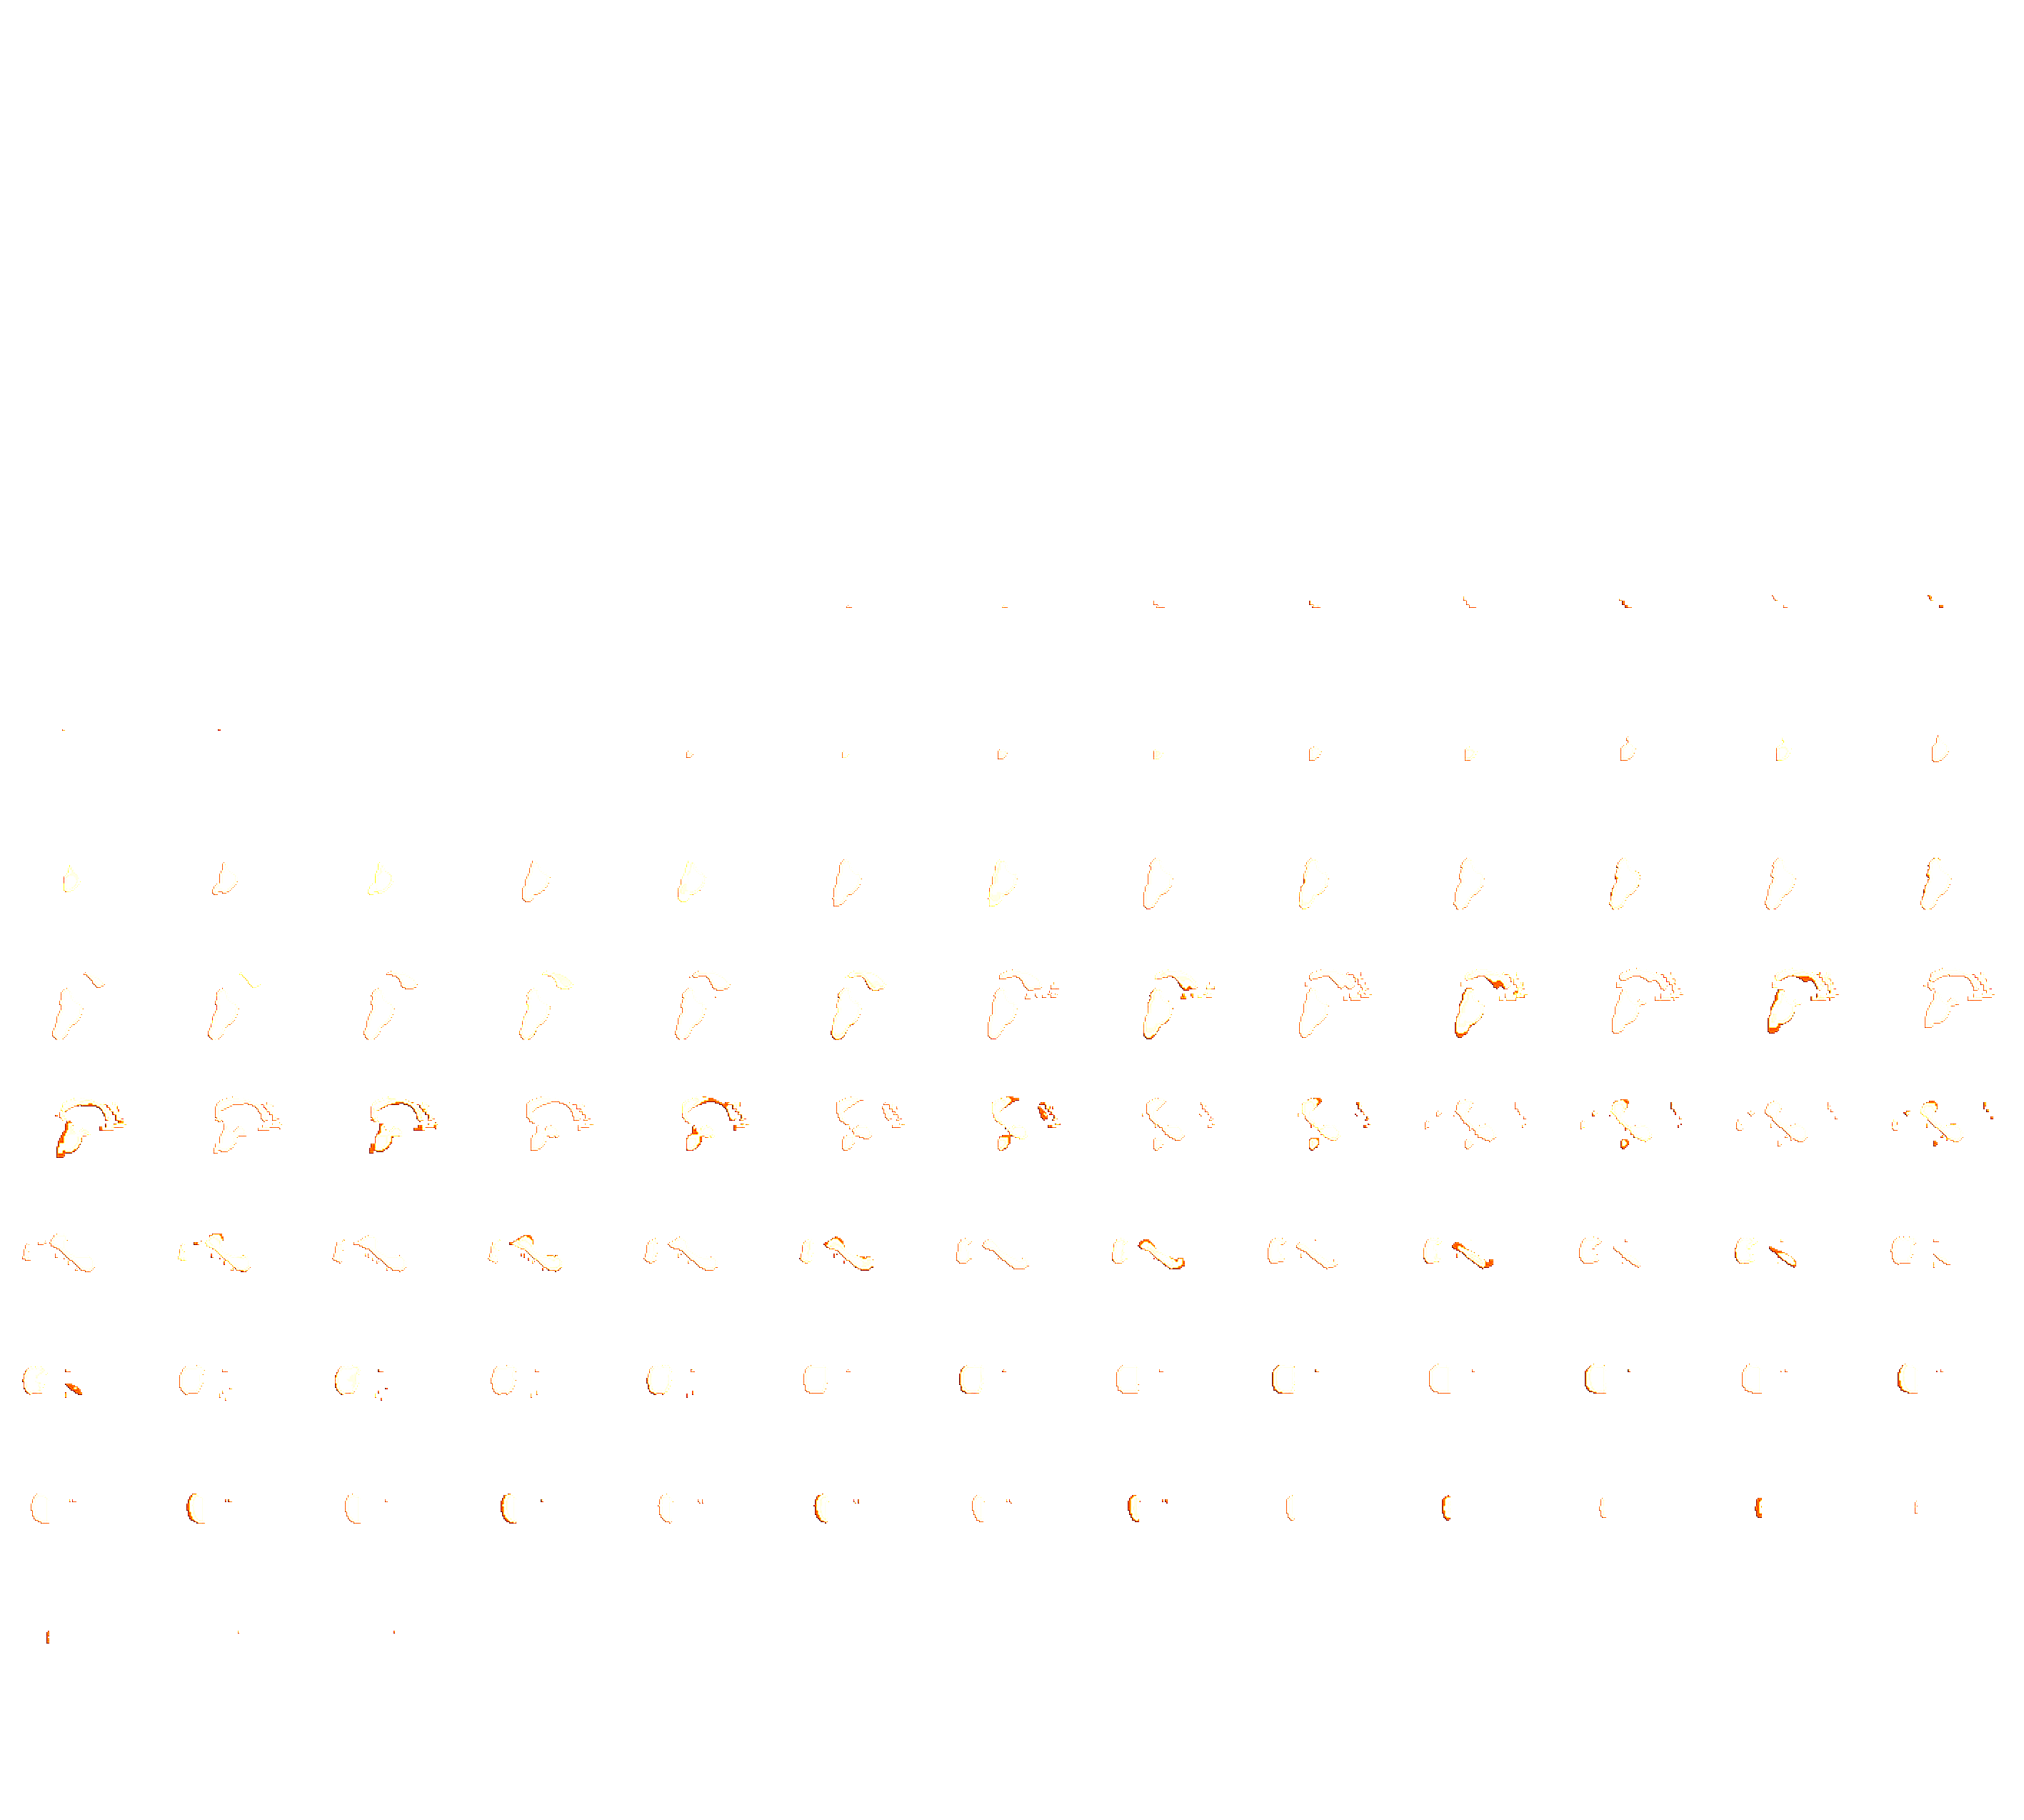

In [26]:
view = plotting.view_img(svm_result, bg_img=stat_img)
# In a Jupyter notebook, if ``view`` is the output of a cell, it will
# be displayed below the cell
view

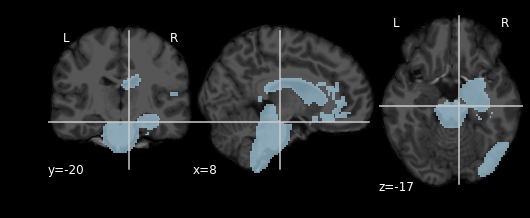

In [27]:
plotting.plot_roi(svm_result, bg_img=stat_img, cmap='Paired')

<b> appendix: Surface

In [28]:
from nilearn import plotting

In [29]:
# https://nilearn.github.io/modules/generated/nilearn.plotting.view_img_on_surf.html

In [30]:
view = plotting.view_img_on_surf(stat_img, threshold='90%')
# view.open_in_browser()

view

In [31]:
# Retrieve destrieux parcellation in fsaverage5 space from nilearn
from nilearn import datasets

destrieux_atlas = datasets.fetch_atlas_surf_destrieux()

# The parcellation is already loaded into memory
parcellation = destrieux_atlas['map_left']

# Retrieve fsaverage5 surface dataset for the plotting background. It contains
# the surface template as pial and inflated version and a sulcal depth maps
# which is used for shading
fsaverage = datasets.fetch_surf_fsaverage()

# The fsaverage dataset contains file names pointing to the file locations
print('Fsaverage5 pial surface of left hemisphere is at: %s' %
      fsaverage['pial_left'])
print('Fsaverage5 inflated surface of left hemisphere is at: %s' %
      fsaverage['infl_left'])
print('Fsaverage5 sulcal depth map of left hemisphere is at: %s' %
      fsaverage['sulc_left'])

Fsaverage5 pial surface of left hemisphere is at: /home/jihoon/miniconda3/lib/python3.8/site-packages/nilearn/datasets/data/fsaverage5/pial.left.gii.gz
Fsaverage5 inflated surface of left hemisphere is at: /home/jihoon/miniconda3/lib/python3.8/site-packages/nilearn/datasets/data/fsaverage5/pial_inflated.left.gii.gz
Fsaverage5 sulcal depth map of left hemisphere is at: /home/jihoon/miniconda3/lib/python3.8/site-packages/nilearn/datasets/data/fsaverage5/sulc.left.gii.gz


In [32]:
fsaverage

{'pial_left': '/home/jihoon/miniconda3/lib/python3.8/site-packages/nilearn/datasets/data/fsaverage5/pial.left.gii.gz',
 'pial_right': '/home/jihoon/miniconda3/lib/python3.8/site-packages/nilearn/datasets/data/fsaverage5/pial.right.gii.gz',
 'infl_left': '/home/jihoon/miniconda3/lib/python3.8/site-packages/nilearn/datasets/data/fsaverage5/pial_inflated.left.gii.gz',
 'infl_right': '/home/jihoon/miniconda3/lib/python3.8/site-packages/nilearn/datasets/data/fsaverage5/pial_inflated.right.gii.gz',
 'sulc_left': '/home/jihoon/miniconda3/lib/python3.8/site-packages/nilearn/datasets/data/fsaverage5/sulc.left.gii.gz',
 'sulc_right': '/home/jihoon/miniconda3/lib/python3.8/site-packages/nilearn/datasets/data/fsaverage5/sulc.right.gii.gz',
 'description': b"fsaverage5\r\n\r\n\r\nNotes\r\n-----\r\nFsaverage5 standard surface as distributed with Freesurfer (Fischl et al, 1999)\r\n\r\nContent\r\n-------\r\n    :'pial_left': Gifti file, left hemisphere pial surface mesh\r\n    :'pial_right': Gifti fil

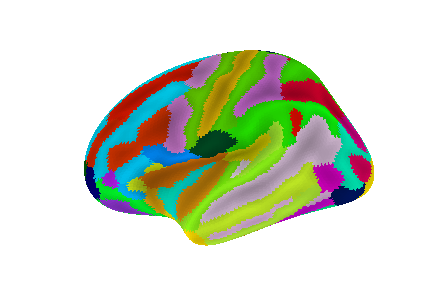

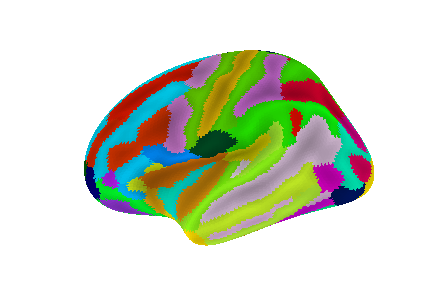

In [33]:
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map=parcellation,
                       hemi='left', view='lateral',
                       bg_map=fsaverage['sulc_left'], bg_on_data=True,
                       darkness=.5)

### 4.2.2. Using FreeSurfer

### 4.2.3. Using FreeSurfer and Nilearn